In [1]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

sys.path.append('../src')
from config import *
from agent import *
from environment import *
from action_slotpair import *

/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dict_action_slotpair, dict_slotpair_action = generate_dict_action_slotpair()

In [3]:
np.random.seed(12)
num_samples = 500
pool = np.array(20)
samples = [np.random.choice(pool, size=NUM_SLOTS, replace=False) for _ in range(num_samples)]
len(samples)

500

In [4]:
env = Environment()
agent = DQNAgent(env, init_model=True)
agent.train(samples)

<State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]>
0
100
200
300
400


In [5]:
scores = copy.deepcopy(agent.log.scores2)
#scores = np.trim_zeros(scores)
scores

array([[-23., -25., -11., ...,  -5.,  -3.,  -5.],
       [-25.,  -3.,  -5., ...,   1., -21., -23.],
       [-19.,  -5.,   1., ...,  23.,  25.,  19.],
       ...,
       [ 15.,  17.,  23., ...,  21.,  23.,  21.],
       [  1.,   7.,  13., ...,  31.,  29.,  31.],
       [  5.,   7.,   9., ...,  11.,  17.,  11.]])

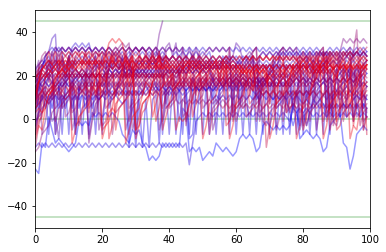

In [13]:
num_eps = scores.shape[0]
step = 10
nums = num_eps // step
for i in range(nums):
    scs = scores[i * step, :]
    scs = np.trim_zeros(scs)
    plt.plot(np.arange(len(scs)), scs, color=(i/nums, 0, 1 - i/nums), alpha=0.4)


plt.hlines(y=45, xmin=0, xmax=NUM_MAX_STEPS, color='g', alpha=0.3)
plt.hlines(y=0, xmin=0, xmax=NUM_MAX_STEPS, color='g', alpha=0.3)
plt.hlines(y=-45, xmin=0, xmax=NUM_MAX_STEPS, color='g', alpha=0.3)
plt.ylim((-50, 50))
plt.xlim((0, NUM_MAX_STEPS))
plt.show()

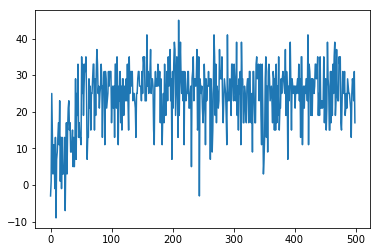

In [24]:
scs = copy.deepcopy(scores)
scs_last = np.array([scs[i][scs[i] != 0][-5:].mean() for i in range(scs.shape[0])])

num = 10
eval_avg = []
for i in range(0, len(scs_last), num):
    eval_avg.append(scs_last[i:i+num].m())
eval_avg = np.array(eval_avg)
plt.plot(np.arange(len(eval_avg)), eval_avg)
plt.show()

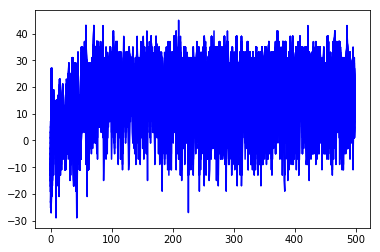

In [8]:
plt.plot(np.arange(len(scores)), scores, color='b')
plt.show()

In [9]:
sc = copy.deepcopy(scores)
sc = sc.ravel()
sc = sc[sc != 0]
pd.Series(sc).value_counts().sort_index()

-29.0       2
-27.0       5
-25.0       4
-23.0       3
-21.0      15
-19.0      28
-17.0      24
-15.0      31
-13.0     107
-11.0     180
-9.0      209
-7.0      313
-5.0      493
-3.0      587
-1.0      556
 1.0      726
 3.0      906
 5.0     1004
 7.0     1244
 9.0     1494
 11.0    1774
 13.0    2178
 15.0    2506
 17.0    2790
 19.0    3604
 21.0    4591
 23.0    4830
 25.0    4607
 27.0    4462
 29.0    3793
 31.0    2971
 33.0    2079
 35.0    1033
 37.0     515
 39.0     211
 41.0      45
 43.0      18
 45.0       1
dtype: int64

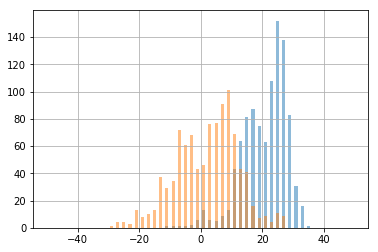

In [10]:
pd.Series(sc[-1000:]).hist(bins=np.arange(-49.5, 50.5, 1), alpha=0.5)
pd.Series(sc[:1000]).hist(bins=np.arange(-49.5, 50.5, 1), alpha=0.5)
#plt.yscale('log')
plt.show()

In [11]:
print(len(agent.memory.pool[2]))
print(len(agent.memory.pool[1]))
print(len(agent.memory.pool[-1]))
print(len(agent.memory.pool[-2]))

2000
2000
2000
2000


In [12]:
agent.eps.epsilon

0.05

In [27]:
s1, a, s2, r, d = agent.memory.pool[2][-2]
print(s1.array)
print(s2.array)
print(a, dict_action_slotpair[a])
print(r)

[ 1  2  9  5  3  8 15 18 13 12]
[ 1  2  9  5  3  8 12 18 13 15]
41 (6, 9)
2


In [28]:
def compute_score(arr):
    comp = arr[np.newaxis, :] - arr[:, np.newaxis]
    slice1, slice2 = np.triu_indices(NUM_SLOTS, 1)
    comp_flat = comp[slice1, slice2]
    comp_flat[comp_flat > 0] = 1
    comp_flat[comp_flat < 0] = -1
    return comp_flat.sum()

print(compute_score(s1.array))
print(compute_score(s2.array))

27
33


In [ ]:
random.shuffle(self.pool[k])

In [15]:
np.random.seed(1234)
num_samples = 10
pool = np.array(20)
samples = [np.random.choice(pool, size=NUM_SLOTS, replace=False) for _ in range(num_samples)]
len(samples)

10

In [16]:
samples

[array([ 3, 13,  2, 16, 14,  5,  4,  0,  8, 18]),
 array([ 8, 19, 13,  1,  4, 17, 14, 11,  9,  0]),
 array([ 2,  3, 17,  6, 16,  8,  9, 15, 13,  5]),
 array([ 7,  0, 18, 11,  4, 14, 13,  5,  2,  1]),
 array([ 8,  3,  5,  0,  6, 13,  1, 14, 17, 11]),
 array([ 9,  3,  8, 13,  6,  2, 12, 11,  5,  0]),
 array([ 7,  2,  5,  3, 14, 19,  1, 18, 10, 17]),
 array([18,  0,  5, 19, 10,  6, 13, 12,  1,  8]),
 array([ 9,  2, 19, 15, 18,  6,  7, 10,  3, 14]),
 array([15, 19, 10, 14,  3, 16,  5, 18, 12, 17])]

In [17]:
env_app = Environment()
agent_app = DQNAgent(env_app, init_model=False)
agent_app.apply(samples)

<State: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]>


In [20]:
scores_app = agent_app.scores2
scores_app.shape

(10, 100)

In [21]:
for i in range(10):
    print(scores_app[i, :].astype(int))

[15 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21 23 21
 23 21 23 21]
[-5  5 15 17 19 25 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29 27 29
 27 29 27 29]
[19 21 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25 23 25
 23 25 23 25]
[-1 17 23 25 31 29 31 29 31 29 31 29 31 29 31 29 31 29 31 29 31 29 31 29
 31 29 31

In [48]:
arr1 = np.array([ 3, 13,  2, 16, 14,  5,  4,  0,  8, 18])
arr2 = np.array([ 3, 4,  2, 16, 14,  5,  13,  0,  8, 18])
arr3 = np.array([ 3, 4,  2, 16, 14,  0,  13,  5,  8, 18])
qs = []
for arr in [arr1, arr2, arr3]:
    q = agent_app.compute_Q(agent_app.model, arr)
    qs.append(q.data)
    idx = np.argmax(q.data)
    print(compute_score(arr), idx, dict_action_slotpair[idx])

5 25 (3, 5)
11 25 (3, 5)
13 25 (3, 5)


In [28]:
qs[0].shape

(10, 45)

In [25]:
for i, q in enumerate(zip(qs[0].data, qs[1].data[0])):
    print('{:2d}, {:+4.3f}, {:+4.3f}, {:+4.3f}'.format(i, q[0], q[1], q[1] - q[0]))

NotImplementedError: multi-dimensional sub-views are not implemented